### continued NoteBook Part1

In [3]:
#import important liberaries 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import warnings
warnings.filterwarnings('ignore')
import os

from sklearn import metrics
%time


CPU times: total: 0 ns
Wall time: 0 ns


All the data preparation and clean up conducted in firts half of note book for this project.

In [4]:
# loading the file that converted to csv from the first part of the this project.
data = pd.read_csv('final_data.csv')

In [5]:
data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,3,1,0,0,0,0,1,6,1,1,...,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,7,1,3,0,0,0,1,6,1,1,...,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,7,1,3,0,1,0,1,6,1,1,...,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,0,1,1,0,0,0,1,6,1,1,...,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,7,1,3,0,0,1,1,6,1,1,...,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


### feature engineering cont.....

In [6]:
# checking the balance of the datasets on target variable "y"
data.y.value_counts(1)

0    0.887696
1    0.112304
Name: y, dtype: float64

The data is imbalance 89%  and 11%

### How to Treat Imbalance Datasets
resumple using downsample, SMOTE or upsample sampling techniques, but for this specifiec dataset I will use SMOTE resampling techniques, which is better fit methode for this data set

In short SMOTE means Create new synthetic data using the nearest neighbors of the minority observations.

In [7]:
# treating imbalance data and see what the shape looks like before and after resampling
from sklearn.model_selection import train_test_split
X = data.drop(['y'], axis=1).values 
y= data['y'].values

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm= sm.fit_resample(X_train, y_train)
print('Original Datasets:', '     ', X_train.shape, y_train.shape)
print('SMOTE sampled dataset:',X_train_sm.shape, y_train_sm.shape)

Original Datasets:       (36130, 20) (36130,)
SMOTE sampled dataset: (64100, 20) (64100,)


In [8]:
X.shape

(45163, 20)

Now we have 64100 in both side. SMOTE doesn't repeate the same data instance as oversampling, it just create new data instance to make balance the minority class to the majority class untile it become balanced.

In [9]:
#scalling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_sm_scaled = scaler.fit_transform(X_train_sm)

### Model Training 
I will train the following classifier models
1. Logistic regression
2. Decision Tree classifire
3. Random Forest classifire
4. Gradient Boosting classifier
5. XGBoost classifier
6. Dummy Classifier

### Dummy Classifier
Dummy classifier will work as referencing frame.

In [10]:
# creating basline or dummy classifier to compare the model I am going to create
# import classifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, 
                             f1_score, brier_score_loss, log_loss)
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# Defines and builds the Dummy classifier
clf = DummyClassifier(strategy="most_frequent")
models_train= clf.fit(X_train_sm,  y_train_sm)
predict= clf.predict(X_train_scaled)
# I took classification -report from Sklearn print(classification_report(y_true, y_pred, target_names=target_names))
print(classification_report(y_test, clf.predict(X_test_scaled)))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8041
           1       0.00      0.00      0.00       992

    accuracy                           0.89      9033
   macro avg       0.45      0.50      0.47      9033
weighted avg       0.79      0.89      0.84      9033



#### The dummy classifier accuracy score is 89% and  it will be taken as betchmark to compare with other algorithms 

##### Logistic regression to predict 

The accuracy score for logistic regression classifier is pretty much the same in the training and test data sets. It looks like there is no any underfitting or over-fitting in this model and may not require a lot of hyperparameter tunning. 

In [11]:
from sklearn.linear_model import LogisticRegression
lrclf = LogisticRegression(random_state=42)
lrclf.fit(X_train_scaled, y_train)
pred = lrclf.predict(X_test_scaled)

print(classification_report(y_test, lrclf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8041
           1       0.66      0.42      0.51       992

    accuracy                           0.91      9033
   macro avg       0.79      0.70      0.73      9033
weighted avg       0.90      0.91      0.90      9033



In [12]:
lrclf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"C":np.logspace(-3,3,20),
              "penalty":["l2", "l1"],
              "solver":['liblinear','newton-cg'],
              'max_iter': [100, 200, 400, 500, 600, 700, 800, 900, 1000]
           }
             

lrclf_cv = RandomizedSearchCV(LogisticRegression(random_state=42), param_grid, verbose=1, cv=3, n_jobs=-1)
lrclf_cv.fit(X_train_scaled, y_train)

print("The best parameters are: ", lrclf_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are:  {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'C': 0.018329807108324356}


In [14]:
lrclf_best = LogisticRegression(solver= 'liblinear', penalty = 'l2', max_iter=700, C = 483.3,random_state=42)
lrclf_best.fit(X_train_scaled, y_train)
LR_pred= lrclf_best.predict(X_test_scaled)

print(classification_report(y_test, lrclf_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      8041
           1       0.65      0.42      0.51       992

    accuracy                           0.91      9033
   macro avg       0.79      0.69      0.73      9033
weighted avg       0.90      0.91      0.90      9033



roc_auc_score is:  0.6945476133405009


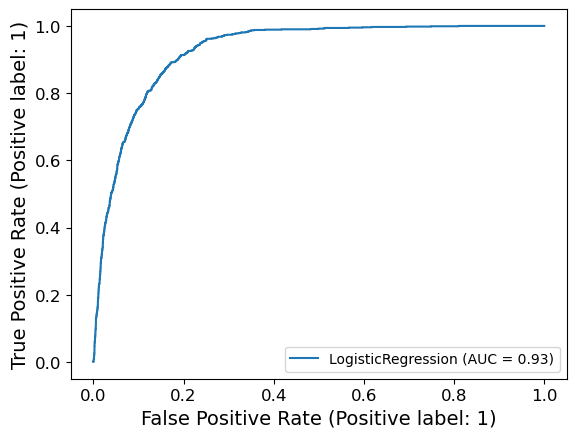

In [15]:
# ROC curve
# It has been taken from Sklearn
metrics.plot_roc_curve(lrclf_best, X_test_scaled, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, LR_pred))

The ROC curve looks pretty good and AUC is 93%, which is 93% of the data points are under ROC curve and also the roc curve jumpped quick high which is this model perform well compare to randon selected classifier

### Decesion Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
D_clf = DecisionTreeClassifier(random_state = 42)
D_clf.fit(X_train_sm, y_train_sm)
pred = clf.predict(X_train_sm)
print(classification_report(y_test, D_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      8041
           1       0.13      0.39      0.20       992

    accuracy                           0.65      9033
   macro avg       0.52      0.54      0.49      9033
weighted avg       0.82      0.65      0.71      9033



In [39]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [17]:
param_grid = {'max_depth':np.arange(2,30,2),
              'min_samples_split':np.arange(10,200, 5),
              'min_samples_leaf':np.arange(2, 40, 5),
              'splitter': ['random', 'best'],
            
              'criterion': ['gini']}

clf_cv = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=1, cv=3)
clf_cv.fit(X_train_sm, y_train_sm)

print("The best parameters are: ", clf_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are:  {'splitter': 'best', 'min_samples_split': 50, 'min_samples_leaf': 7, 'max_depth': 20, 'criterion': 'gini'}


In [17]:
clf_best = DecisionTreeClassifier(random_state = 42, splitter = 'best', min_samples_split=10,
                                 min_samples_leaf=2, max_depth = 28, criterion = 'gini')
clf_best.fit(X_train_sm, y_train_sm)
dec_pred = clf_best.predict(X_test)

print(classification_report(y_test, clf_best.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8041
           1       0.57      0.57      0.57       992

    accuracy                           0.91      9033
   macro avg       0.76      0.76      0.76      9033
weighted avg       0.91      0.91      0.91      9033



Accuracy improved from 0.65 to .91, It is not a big difference but stile some improvment. Since I have computing power issues I was not able to use grid search rather I will stick with Random grid search

roc_auc_score is:  0.7587242524200569


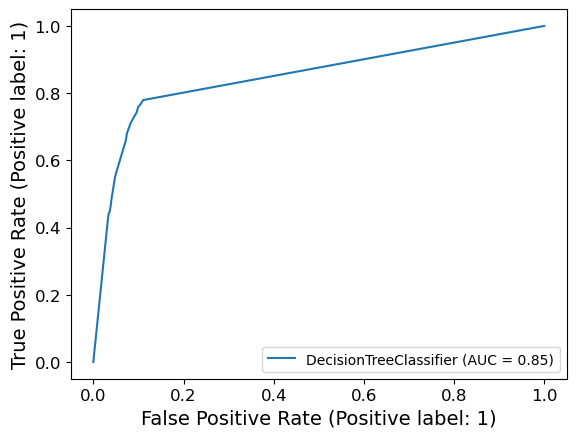

In [41]:
# ROC curve for decision tree
metrics.plot_roc_curve(clf_best, X_test, y_test)
print('roc_auc_score is: ', roc_auc_score(y_test, dec_pred))

##### Random forest classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
Rand_clf1 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split = 8,random_state=42)
Rand_clf1.fit(X_train_scaled, y_train)
predict = Rand_clf1.predict(X_test)

print("Accuracy on training set: ", accuracy_score(y_train, Rand_clf1.predict(X_train_scaled)))
print("Accuracy on test set", accuracy_score(y_test, predict))

Accuracy on training set:  0.9424577913091614
Accuracy on test set 0.3604561053913429


The model accuracy score in the traing data perform way better than in the test data. Probably the may be overfitting and it may require hyperparameter tunning.

In [21]:

param_grid = {'max_depth':np.arange(2,30,2),
              'min_samples_split':np.arange(10,200, 5),
              'n_estimators':np.arange(100,1000,10)}

Rand_clf_cv = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=1, cv=3)
Rand_clf_cv.fit(X_train_scaled, y_train)

print("The best parameters are: ", Rand_clf_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are:  {'n_estimators': 730, 'min_samples_split': 55, 'max_depth': 22}


In [22]:
param_grid = {'max_depth':np.arange(24,36,1),
              'min_samples_split':np.arange(10,20, 2),
              'n_estimators':np.arange(200,500,5)}

Rand_clf_cv0 = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_grid, verbose=1, cv=3)
Rand_clf_cv0.fit(X_train_scaled, y_train)

print("The best parameters are: ", Rand_clf_cv0.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
The best parameters are:  {'n_estimators': 450, 'min_samples_split': 10, 'max_depth': 33}


In [40]:
Rand_clf = RandomForestClassifier(n_estimators=450, max_depth=33, min_samples_split = 10,random_state=42)
Rand_clf.fit(X_train_scaled, y_train)
predict = Rand_clf.predict(X_test_scaled)

#print("Accuracy on training set: ", accuracy_score(y_train, Rand_clf_best.predict(X_train)))
#print("Accuracy on test set", accuracy_score(y_test, predict))

print(classification_report(y_test, Rand_clf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      8041
           1       0.66      0.53      0.59       992

    accuracy                           0.92      9033
   macro avg       0.80      0.75      0.77      9033
weighted avg       0.91      0.92      0.91      9033



Random forest classifier accuracy improved to 92% which is a lot better that dummy classifier acuuracy

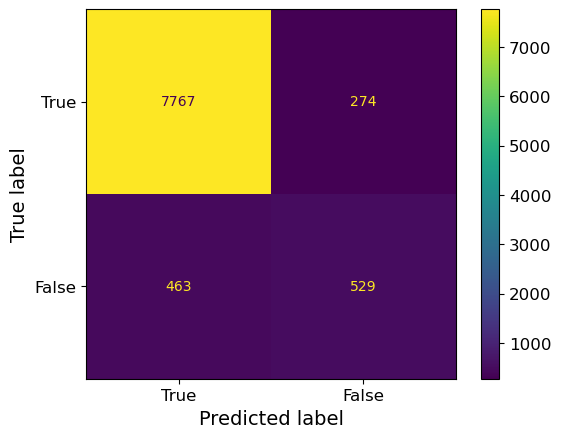

In [42]:
# checking confusion matrics to see how many of them classified correctly and how many of them miss classified

# I took this from sklearn (confusion_matrix(y_true, y_pred
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
confusion_matrix = metrics.confusion_matrix(y_test, Rand_clf.predict(X_test_scaled))

display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

display.plot()
plt.show()

Based on the above confusion matrics Random forest algorithm was able to classify 7767 and 529 poits or 8296 points in total correctly and 463 and 274 incorrectly. It looks like it does a great job

#### Gradient Boosting 
Three core points
1. used to optimize loss function 
2. weak learner learn from thier mistatke to make prediction or weak learner to make prediction
3. an addtive model to add week learners to minimize loss function

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gbclf = GradientBoostingClassifier(max_depth= 1, n_estimators=50, learning_rate=0.1, random_state=42)
gbclf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=42)

In [27]:
print("Accuracy on training set: ", accuracy_score(y_train, gbclf.predict(X_train_scaled)))
print("Accuracy on test set", accuracy_score(y_test, gbclf.predict(X_test_scaled)))

Accuracy on training set:  0.9061444782729035
Accuracy on test set 0.9066755230820326


In [15]:
# generating classifiers report. I learned it from you tube and found it interesting. 
from sklearn.metrics import classification_report
gbclf.predict(X_test_scaled)
print(classification_report(y_test, gbclf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      8041
           1       0.70      0.26      0.38       992

    accuracy                           0.91      9033
   macro avg       0.81      0.62      0.66      9033
weighted avg       0.89      0.91      0.89      9033



In [29]:
#gbclf.get_params()

In [32]:
from sklearn.model_selection import RandomizedSearchCV
grid_param = {
    'learning_rate':np.arange(0.05,1.0, 0.05),
    'max_depth':np.arange(1,40,2),
    'n_estimators':np.arange(100,900,100),
    'min_samples_split':np.arange(10,200, 5),
    'min_samples_leaf':np.arange(2, 40, 5),                              
}

gbclf_cv = RandomizedSearchCV(gbclf, grid_param, cv = 3, random_state=42, verbose=1)

gbclf_cv.fit(X_train_scaled,y_train)

print("Best Parameters:",gbclf_cv.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 155, 'min_samples_leaf': 17, 'max_depth': 33, 'learning_rate': 0.15000000000000002}


In [23]:
gbclf_best = GradientBoostingClassifier(max_depth= 33, n_estimators=200, learning_rate=0.15, min_samples_split=155,
                                        min_samples_leaf=17, random_state=42)
gbclf_best.fit(X_train_scaled,y_train)
grdb_pred = gbclf_best.predict(X_test_scaled)
print(classification_report(y_test, gbclf_best.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8041
           1       0.61      0.55      0.58       992

    accuracy                           0.91      9033
   macro avg       0.78      0.75      0.76      9033
weighted avg       0.91      0.91      0.91      9033



In [45]:
print(metrics.confusion_matrix(y_test, gbclf_best.predict(X_test_scaled)))

[[7684  357]
 [ 445  547]]


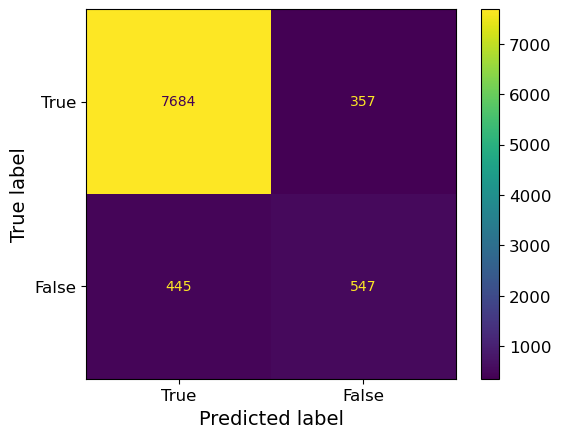

In [46]:
# checking confusion matrics to see how many of them classified correctly and how many of them miss classified

# I took this from sklearn (confusion_matrix(y_true, y_pred
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
confusion_matrix = metrics.confusion_matrix(y_test, gbclf_best.predict(X_test_scaled))

display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

display.plot()
plt.show()

7684 and 547 in total 8231 lables are correctly catagorized but 445 and 

In [9]:

from xgboost import XGBClassifier
xgb = XGBClassifier()

In [23]:
# define parameters those will go in grid search
param_grid = {"max_depth": np.arange(2, 100,4),
              "max_features" :np.arange(2,30, 2),
              "min_samples_leaf" :np.arange(2,100, 4),
              "n_estimators": np.arange(100,1000,20),
              "learning_rate":np.arange(0.05,1.0,0.01)}

In [24]:
#perfom grid search
grids_cv = RandomizedSearchCV(xgb, param_grid, cv = 3, verbose=1, n_jobs=-1 )
grids_cv.fit(X_train_scaled, y_train)
print("Best Parameters:",grids_cv.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[12:31:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:31:52] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters: {'n_estimators': 920, 'min_samples_leaf': 38, 'max_features': 24, 'max_depth': 50, 'learning_rate': 0.19}


In [25]:
xgb_clf_best = XGBClassifier(n_estimators=920, max_depth=50,min_samples_leaf =38 ,
                             learning_rate=0.19, max_features= 24, objective='binary:logistic')
model = xgb_clf_best.fit(X_train_scaled, y_train)

print(classification_report(y_test, xgb_clf_best.predict(X_test_scaled)))


[12:35:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:35:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8041
           1       0.60      0.57      0.58       992

    accuracy                           0.91      90

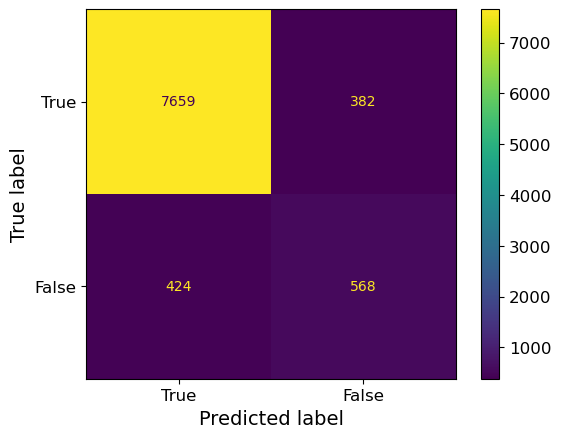

In [26]:
# checking confusion matrics to see how many of them classified correctly and how many of them miss classified
confusion_matrix = metrics.confusion_matrix(y_test, xgb_clf_best.predict(X_test_scaled))

display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])

display.plot()
plt.show()

### Conclusion
Tabular representation of each models accuracy, precesion and recall 

In [32]:
# installing tabulate
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [33]:
# import tabulate
from tabulate import tabulate

In [36]:
#creating tablular report of the results
table = [['Models', 'Accuracy', 'Precission', 'Recall'],
        ['Dummy Classifier', '0.89', '0.79', '0.89'],
        ['Decision Tree',    '0.90', '0.90', '0.90'],
        ['Random Forest', '0.92', '0.91', '0.92'],
        ['XGBoost',       '0.91', '0.91', '0.91'],
        ['Logistic Regression', '0.91', '0.90', '0.90'],]
print('Final Results Table')
print('  ')
print(tabulate(table, headers = 'firstrow'))

Final Results Table
  
Models                 Accuracy    Precission    Recall
-------------------  ----------  ------------  --------
Dummy Classifier           0.89          0.79      0.89
Decision Tree              0.9           0.9       0.9
Random Forest              0.92          0.91      0.92
XGBoost                    0.91          0.91      0.91
Logistic Regression        0.91          0.9       0.9


few comments about the project 
1. my computer's computing power was not enough to do gridsearch as a result I was enforced to us Randemised search and it was not able to improve the accuracy that much 
2. I was not able to completly removed everysingle unkowns in all catagorical variable 

Most of the algorithms have pretty much the same accuracy but
Random forest performed a bit better that the other classifier algorith when we compare Accuracy, precission and recall, but xgboost also has pretty close to random forest performance and I decided to use confusion matrice in these two models and I found they classify very close numbers of instance correctly and as well as incorrectly but random forest did a better job in a very smal margin. Based this two analysis I will stick with Random forest for my model deployment. 

In [54]:
# testing the final model
Rand_clf.predict(X_test_scaled[0].reshape(1, -1))

array([0], dtype=int64)

### pickeling the model file for Deployment
The pickle module is used for implementing binary protocols for serializing and de-serializing a Python object structure. Pickling: It is a process where a Python object hierarchy is converted into a byte stream.
source: pyhon wikipedia

In [23]:
#first option is pickle
import pickle

In [49]:
pickle.dump(Rand_clf, open('Rand_clf.pkl', 'wb'))

In [50]:
#file = open("Rand_clf.pkl", "rb")

#load
model= pickle.load( open("Rand_clf.pkl", "rb"))

#predict
prediction = model.predict(X[0].reshape(1, -1))
prediction

array([0], dtype=int64)

In [51]:
# second option is joblib
import joblib

In [28]:
joblib.dump(Rand_clf, 'model_save')

['model_save']

In [29]:
loaded_joblib = joblib.load('model_save')

In [30]:
loaded_joblib.predict(X[0].reshape(1, -1))

array([0], dtype=int64)